# Variational Quantum Linear Solver for Newton-Raphson 
As explained in the previous notebook, the Newton Raphson approach relies on the solution of a linear system. Several quantum linear solvers have been developped, one of them being the Variational Quantum linear solver. This solver uses a variational approach to solve the system of linear equations.

## Example 
To make things clearer let's consider the following example:

$$
f_1(x,y) = 0.2 x^3 - 0.4 y \\
f_2(x,y) = - 0.4 x  + 0.8 y^2 \\
$$

That we define in the following function

In [1]:
import numpy as np
def func(input):
    def f1(x,y):
        return 0.1*(2*x**3 - 4* y)
    def f2(x,y):
        return 0.1*(- 4 * x + 8*y**2)
    x, y = input
    return np.array([f(x,y) for f in[f1,f2]])

# Using HHL to solve the linear system

The `QuantumNewtonRaphson` can use our `HHL` solver to solve the linear system of equations at the hart of the newton raphson routine.  

In [6]:
from qiskit.primitives import Estimator, Sampler
from quantum_newton_raphson.newton_raphson import newton_raphson
from quantum_newton_raphson.hhl_solver import HHL_SOLVER

estimator = Estimator()
sampler = Sampler()

# define the linear solver with the reorder solver
solver = HHL_SOLVER(estimator=estimator, sampler=sampler)

# Solve the newton raphson problem
res = newton_raphson(func, np.random.rand(2), linear_solver=solver, verbose=True, max_iter=25)


0/25 error = 0.3738625403292242(1e-10)
1/25 error = 2.9110724472903575(1e-10)
2/25 error = 0.979626563062661(1e-10)
3/25 error = 0.3885685466915867(1e-10)
4/25 error = 0.6486436589561824(1e-10)
5/25 error = 1.077842883097303(1e-10)
6/25 error = 8.615542215200234(1e-10)
7/25 error = 32.89104524023921(1e-10)
8/25 error = 9.674283584503492(1e-10)
9/25 error = 2.7886703079782325(1e-10)
10/25 error = 0.7559982913477897(1e-10)
11/25 error = 0.18548597823067847(1e-10)
12/25 error = 0.024475452511216966(1e-10)
13/25 error = 0.0009986025716496095(1e-10)
14/25 error = 4.8716497400924653e-05(1e-10)
15/25 error = 2.24151518022353e-06(1e-10)
16/25 error = 1.1366709387061747e-07(1e-10)
17/25 error = 5.259977964300333e-09(1e-10)
18/25 error = 2.675438537380615e-10(1e-10)


We can check the solution against the solution obatined via a classical newton raphson 

[1.14869835 0.75785828]
[1.14869836 0.75785828]


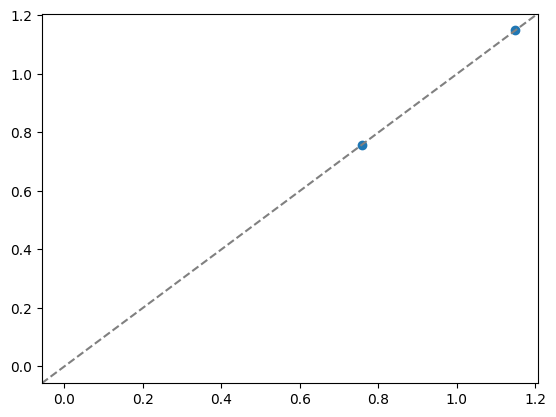

In [7]:
import matplotlib.pyplot as plt
res_ref = newton_raphson(func, np.random.rand(2))
plt.scatter(res_ref.solution, res.solution)
_ = plt.axline( (0,0),slope=1,linestyle='--',color='grey')
print(res_ref.solution)
print(res.solution)